In [441]:
#sideris

# Corporate Prosecution - Exercise Q

#### Summary

Investigate the differences between different states' prosecution of corporate issues.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Source

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [442]:
import pandas as pd
% matplotlib inline

df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,272734,12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2003,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,24000,nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,14640,nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2006,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,25000,nan,0,2500,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [443]:
df.shape

(3038, 56)

### List the columns and their data types

In [444]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- FINE
- TOTAL_PAYMENT
- USAO
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [445]:
# PRIMARY_CRIME_CODE - types of crime.
# DISPOSITION_TYPE -  indicates whether the prosecution was resolved through a type of agreement.
# AGREEMENT_TYPE -  indicates whether the agreement is a plea ("plea"), non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")
# FINE - amount of fine in U.S. dollars.
# TOTAL_PAYMENT - Sum of all monetary penalties (i.e. fines, restitution, forfeiture, disgorgements, community service, etc.)
# USAO - U.S. Attorney's Offices involved in the prosecution.
# AGREEMENT_REQUIRED_NEW_POSITIONS - Agreement recquires new positions to be created
# INDEP_MONITOR_REQUIRED - Whether or not the agreement recquires retaining and independent actor to retained for monitoring ????

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [446]:
pd.options.display.max_columns

60

## Set pandas to display 60 columns

In [447]:
pd.set_option("display.max_columns", 60)
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,272734,12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2003,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,24000,nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,14640,nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2006,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,25000,nan,0,2500,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN


## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [448]:
pd.options.display.max_rows
pd.set_option("display.max_rows", 100)
df

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,272734,12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2003,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,24000,nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,14640,nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2006,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,25000,nan,0,2500,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,500000,0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2001,PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,2000,0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2013,PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,42000,0,0,0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2012,PACER,NaN
8,2530,"83rd & Union Hills, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Manageme

## Describe the REGULATORY_FINE column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [449]:
df['REGULATORY_FINE'].describe()

count          147
mean      49055647
std      140566295
min              0
25%              0
50%        2000000
75%       23450000
max     1000000000
Name: REGULATORY_FINE, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with ZERO decimal points. And tell it to use a `,` in the thousands position.

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [450]:
pd.set_option("display.float_format", "{:.0f}".format)
df['REGULATORY_FINE'].describe()

count          147
mean      49055647
std      140566295
min              0
25%              0
50%        2000000
75%       23450000
max     1000000000
Name: REGULATORY_FINE, dtype: float64

## Look at the total payments for the first two rows. Pretty nice!

In [451]:
df['TOTAL_PAYMENT'].head(2)

0    272734
1     24000
Name: TOTAL_PAYMENT, dtype: int64

# A little summarizing

## What were the most popular crimes?

In [452]:
df['PRIMARY_CRIME_CODE'].value_counts()

Environmental                               541
Fraud - General                             484
Antitrust                                   253
Other                                       219
Import / Export                             158
False Statements                            139
Immigration                                 138
FCPA                                        135
Fraud - Tax                                 125
FDCA / Pharma                               113
Act to Prevent Pollution from Ships         103
Wildlife                                     97
Food                                         88
Fraud - Health Care                          84
Money Laundering                             72
Controlled substances / Drugs / Meth Act     55
Bank Secrecy Act                             54
Fraud - Securities                           31
OSHA / Workplace Safety / Mine Safety        31
Kickbacks                                    30
Gambling                                

### Graph the previous answer, with the longest bar on top

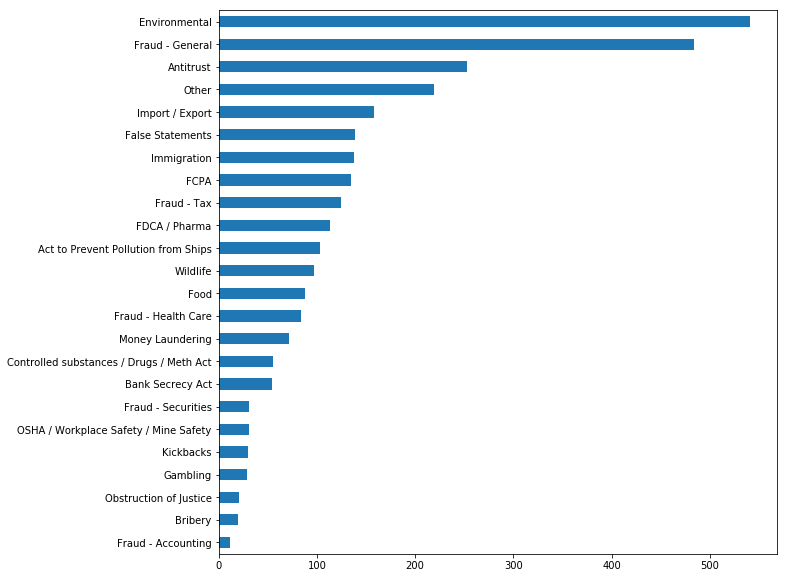

In [453]:
df['PRIMARY_CRIME_CODE'].value_counts().sort_values().plot(kind='barh', figsize = (10,10))

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, primary crime code, US Attorney's Office and total payment.

In [454]:
columns = ['COMPANY', 'DISPOSITION_TYPE', 'PRIMARY_CRIME_CODE', 'USAO', 'TOTAL_PAYMENT']
new_df = pd.read_csv('cpr-data.csv', usecols = columns)
new_df

,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,USAO,TOTAL_PAYMENT
0,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,Virginia - Eastern District,272734
1,"3D Poultry Loading, Inc.",plea,Immigration,Arkansas - Western District,24000
2,"3rd & Bell, LLC",plea,Immigration,Arizona,50
3,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,Georgia - Northern District,14640
4,"45,000, Inc.",plea,Environmental,Louisiana - Middle District,27500
5,4628 Group Inc.,plea,Environmental,New York - Northern District,500000
6,"70 North, LLC",plea,Environmental,Alaska,2000
7,806 Trading Corp.,plea,Other,New Jersey,42000
8,"83rd & Union Hills, LLC",plea,Immigration,Arizona,50
9,"84th & Bell, LLC",plea,Immigration,Arizona,50


## Confirm it has 3038 rows and 5 columns

In [455]:
new_df.shape

(3038, 5)

## Using this subset, try to extract the state name of the US Attorney's Office into a separate column called `state`

Your machine will complain. **Let's talk about that error.**

In [456]:
new_df['state'] = new_df['USAO'].str.extract(r"(\w+ ?\w+ ?\w+)")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [457]:
new_df

,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,USAO,TOTAL_PAYMENT,state
0,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,Virginia - Eastern District,272734,Virginia
1,"3D Poultry Loading, Inc.",plea,Immigration,Arkansas - Western District,24000,Arkansas
2,"3rd & Bell, LLC",plea,Immigration,Arizona,50,Arizona
3,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,Georgia - Northern District,14640,Georgia
4,"45,000, Inc.",plea,Environmental,Louisiana - Middle District,27500,Louisiana
5,4628 Group Inc.,plea,Environmental,New York - Northern District,500000,New York
6,"70 North, LLC",plea,Environmental,Alaska,2000,Alaska
7,806 Trading Corp.,plea,Other,New Jersey,42000,New Jersey
8,"83rd & Union Hills, LLC",plea,Immigration,Arizona,50,Arizona
9,"84th & Bell, LLC",plea,Immigration,Arizona,50,Arizona


## Look at the first 25 states.

Confirm they match the following. If they don't, improve your technique from above.

    0        Virginia
    1        Arkansas
    2         Arizona
    3         Georgia
    4       Louisiana
    5        New York
    6          Alaska
    7      New Jersey
    8         Arizona
    9         Arizona
    10       Virginia
    11       Virginia
    12      Louisiana
    13       New York
    14         Kansas
    15    Mississippi
    16         Oregon
    17        Florida
    18     California
    19      Louisiana
    20        Vermont
    21       New York
    22       New York
    23          USDOJ
    24          USDO

In [458]:
new_df['state'].head(25)

0        Virginia
1        Arkansas
2         Arizona
3         Georgia
4       Louisiana
5        New York
6          Alaska
7      New Jersey
8         Arizona
9         Arizona
10       Virginia
11       Virginia
12      Louisiana
13       New York
14         Kansas
15    Mississippi
16         Oregon
17        Florida
18     California
19      Louisiana
20        Vermont
21       New York
22       New York
23          USDOJ
24          USDOJ
Name: state, dtype: object

## Hmm, maybe you should clean that up a little more and try again.

In [459]:
# ¯\_(ツ)_/¯

## Which state has had the most total cases?

In [460]:
new_df['state'].value_counts().head(5)

USDOJ         580
Florida       220
California    215
New York      179
Texas         124
Name: state, dtype: int64

## Which state has had the most total fines?

In [461]:
new_df.groupby('state')['TOTAL_PAYMENT'].sum().sort_values(ascending = False)

state
USDOJ                   23765228750
New York                15699780905
Louisiana                4531757633
Massachusetts            4476920454
Michigan                 3941190981
Virginia                 2254367316
Florida                  1809225843
Pennsylvania             1751471389
District of Columbia     1581435794
Connecticut              1511960683
California               1153522038
New Jersey                902173331
Texas                     692004039
Illinois                  608519488
Ohio                      587424909
Rhode Island              543548834
Georgia                   484094806
Minnesota                 378928336
Wisconsin                 304374202
Oklahoma                  255233460
North Carolina            217725035
MIchigan                  200000000
Maryland                  153173049
Missouri                  125585685
Alabama                   114555399
North Dakota              101376831
Mississippi                74176031
Delaware              

## Show me both the count AND the sum in the same dataframe

- Tip: There's a quick way to do this if you'd like

In [462]:
df_tp = new_df.groupby('state')['TOTAL_PAYMENT'].agg(['count', 'sum'])
df_tp

,count,sum
state,,
Alabama,27,114555399
Alaska,19,60718216
Arizona,34,10455037
Arkansas,24,3071778
California,215,1153522038
Colorado,22,8618944
Connecticut,58,1511960683
Delaware,11,70622580
District of Columbia,46,1581435794


## Graph that, but only for "real" states

Here's a list of state names, if you'd like:

    ['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']

In [463]:
states = ['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']
real_state = new_df[new_df['state'].isin(states)].groupby('state')['TOTAL_PAYMENT'].agg(['count', 'sum'])


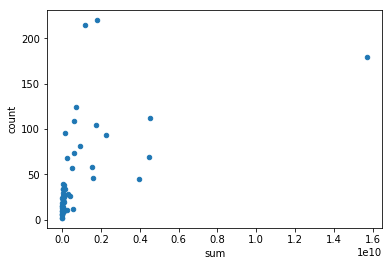

In [464]:
real_state.plot(kind = 'scatter', x = 'sum', y = 'count')

## What are the states that have so many prosecutions but so little money?

In [468]:
real_state.sort_values(by = 'count', ascending = False)

,count,sum
state,,
Florida,220,1809225843
California,215,1153522038
New York,179,15699780905
Texas,124,692004039
Louisiana,112,4531757633
Ohio,109,587424909
Pennsylvania,105,1751471389
Missouri,96,125585685
Virginia,93,2254367316


# Make another comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

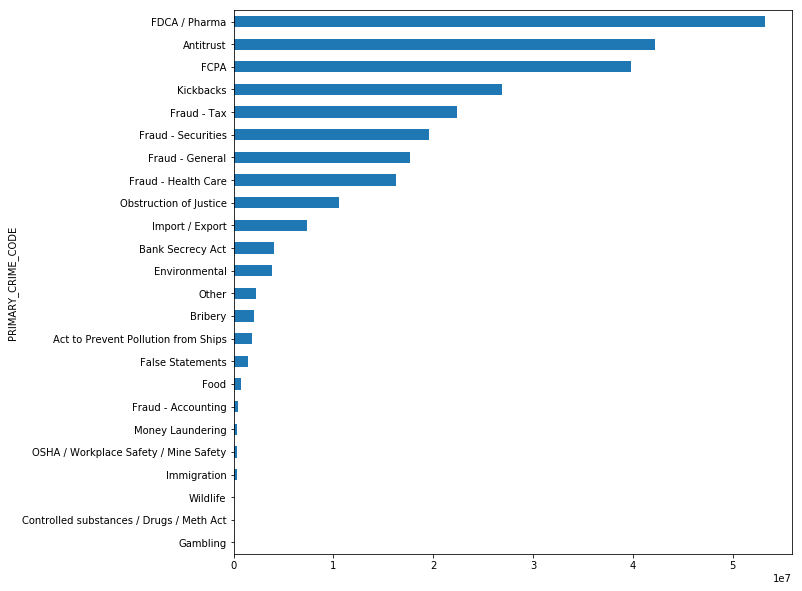

In [466]:
df.groupby('PRIMARY_CRIME_CODE')['FINE'].mean().sort_values().plot(kind = 'barh', figsize = (10,10))